In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EXL_EQ_2023_Dataset.csv")
#df

In [ ]:
df.isnull().sum()

PM2.5                                                 5540
NO                                                    4849
NO2                                                   5340
NOx                                                   5972
NH3                                                   5636
SO2                                                   3884
CO                                                    3822
Ozone                                                 4430
Benzene                                               6097
Toluene                                              56554
Temp                                                172116
RH                                                   27211
WS                                                    7080
WD                                                    5809
SR                                                   16383
BP                                                   64451
AT                                                   215

In [ ]:
df = df.rename(columns={'O3': 'Ozone'})

In [ ]:
limit = 800
name = 'PM2.5'
count = (df[name] > limit).sum()
count

3

<Axes: >

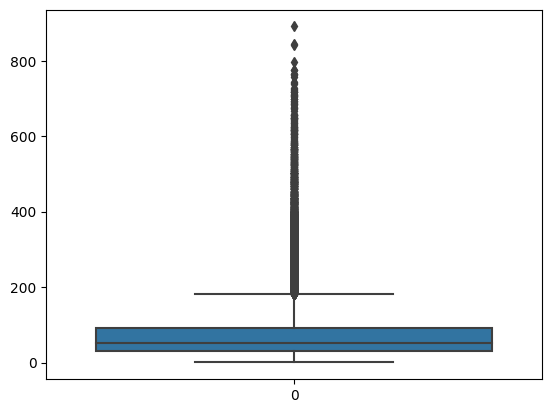

In [ ]:
import seaborn as sns
sns.boxplot(df['PM2.5'])  #checking for outliers

In [ ]:
from datetime import datetime
df['Time Periods'] = pd.to_datetime(df['Time Periods'])

# Set the "Year" column as the index
df.set_index('Time Periods',inplace=True, drop = False)
df.index = pd.to_datetime(df.index)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df = df.copy(deep=True)

mice_imputer = IterativeImputer()

df['PM2.5'] = mice_imputer.fit_transform(df[['PM2.5']])
#df['PM10'] = mice_imputer.fit_transform(df[['PM10']])
df['NO'] = mice_imputer.fit_transform(df[['NO']])
df['NOx'] = mice_imputer.fit_transform(df[['NOx']])
df['NH3'] = mice_imputer.fit_transform(df[['NH3']])
df['CO'] = mice_imputer.fit_transform(df[['CO']])
df['SO2'] = mice_imputer.fit_transform(df[['SO2']])
df['Ozone'] = mice_imputer.fit_transform(df[['Ozone']])
df['Benzene'] = mice_imputer.fit_transform(df[['Benzene']])
df['Toluene'] = mice_imputer.fit_transform(df[['Toluene']])
df['Xylene'] = mice_imputer.fit_transform(df[['Xylene']])
#df['AQI'] = mice_imputer.fit_transform(df[['AQI']])
df['NO2'] = mice_imputer.fit_transform(df[['NO2']])
df['Eth-Benzene'] = mice_imputer.fit_transform(df[['Eth-Benzene']])
df['MP-Xylene'] = mice_imputer.fit_transform(df[['MP-Xylene']])
df['O Xylene'] = mice_imputer.fit_transform(df[['O Xylene']])
df['CH4'] = mice_imputer.fit_transform(df[['CH4']])
#df['CNG ONLY'] = mice_imputer.fit_transform(df[['CNG ONLY']])



In [ ]:
df.isnull().sum()

PM2.5                                                    0
NO                                                       0
NO2                                                      0
NOx                                                      0
NH3                                                      0
SO2                                                      0
CO                                                       0
Ozone                                                    0
Benzene                                                  0
Toluene                                                  0
Temp                                                172116
RH                                                   27211
WS                                                    7080
WD                                                    5809
SR                                                   16383
BP                                                   64451
AT                                                   215

In [ ]:
from datetime import datetime
df['Time Periods'] = pd.to_datetime(df['Time Periods'])

In [ ]:
def mergeColumns(data):
    data['Time Periods'] = pd.to_datetime(data['Time Periods'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    #data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

def subsetColumns(data):
    pollutants = ['PM2.5', 'NO2', 'CO','SO2', 'Ozone', 'BTX','NOx','CH4','Eth-Benzene','Xylene','MP-Xylene','O Xylene']
    columns =  ['Time Periods', 'City'] + pollutants
    data = data[columns]
    return data, pollutants
def handleMissingValues(data):
   # missing_values = getMissingValues(data)
    newCityData = mergeColumns(data)
    newCityData, pollutants = subsetColumns(newCityData)
    return newCityData, pollutants

newCityData, newColumns = handleMissingValues(df)
newCityData

,Time Periods,City,PM2.5,NO2,CO,SO2,Ozone,BTX,NOx,CH4,Eth-Benzene,Xylene,MP-Xylene,O Xylene
0,2020-01-01 00:00:00,Delhi,549.256878,91.247522,3.520142,10.175812,23.411029,31.192532,188.364425,467.789661,12.631271,8.421787,10.638247,57.772944
1,2020-01-01 04:00:00,Delhi,435.438303,79.661701,3.464807,11.615925,29.331609,37.289815,203.481853,467.789661,12.631271,8.421787,10.638247,57.772944
2,2020-01-01 08:00:00,Delhi,453.312378,121.740909,2.460498,10.590183,30.172308,36.548362,153.914993,467.789661,12.631271,8.421787,10.638247,57.772944
3,2020-01-01 12:00:00,Delhi,186.603123,114.142207,1.405930,12.217971,30.493537,116.781550,91.504524,467.789661,12.631271,8.421787,10.638247,57.772944
4,2020-01-01 16:00:00,Delhi,262.616309,123.790340,2.692100,13.331616,18.045684,110.745620,117.065760,467.789661,12.631271,8.421787,10.638247,57.772944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223579,2022-12-31 04:00:00,Mumbai,196.989121,88.463906,2.336561,53.108086,55.699203,13.283238,104.906711,467.789661,3.797530,1.671140,3.311368,80.770000
223580,2022-12-31 08:00:00,Mumbai,187.428487,93.311216,2.235001,55.535340,73.030945,11.858702,103.099160,467.789661,3.472140,1.490215,2.900437,67.340000
223581,2022-12-31 12:00:00,Mumbai,176.635690,87.318776,1.754315,53.701056,93.830288,11.917306,80.058537,467.789661,3.552415,1.594616,2.774356,58.630000
223582,2022-12-31 16:00:00,Mumbai,189.740021,54.773063,1.361177,40.155829,73.099207,8.357045,51.766913,467.789661,3.043429,1.058939,2.089190,66.190000


In [ ]:
newCityData.isnull().sum()

Time Periods    0
City            0
PM2.5           0
NO2             0
CO              0
SO2             0
Ozone           0
BTX             0
NOx             0
CH4             0
Eth-Benzene     0
Xylene          0
MP-Xylene       0
O Xylene        0
dtype: int64

In [ ]:
min_Particulate_Matter = newCityData['PM2.5'].min()
max_Particulate_Matter = newCityData['PM2.5'].max()
newCityData['PM2.5_new'] = [(x-min_Particulate_Matter)/(max_Particulate_Matter-min_Particulate_Matter)
                                         for x in newCityData['PM2.5']]

min_NO2	= newCityData['NO2'].min()
max_NO2 = newCityData['NO2'].max()
newCityData['NO2_new'] = [(x-min_NO2)/(max_NO2-min_NO2) for x in newCityData['NO2']]

min_CO= newCityData['CO'].min()
max_CO = newCityData['CO'].max()
newCityData['CO_new'] = [(x-min_CO)/(max_CO-min_CO) for x in newCityData['CO']]

min_SO2= newCityData['SO2'].min()
max_SO2 = newCityData['SO2'].max()
newCityData['SO2_new'] = [(x-min_SO2)/(max_SO2-min_SO2) for x in newCityData['SO2']]

min_O3= newCityData['Ozone'].min()
max_O3 = newCityData['Ozone'].max()
newCityData['Ozone_new'] = [(x-min_O3)/(max_O3-min_O3) for x in newCityData['Ozone']]

min_BTX = newCityData['BTX'].min()
max_BTX = newCityData['BTX'].max()
newCityData['BTX_new'] = [(x-min_BTX)/(max_BTX-min_BTX) for x in newCityData['BTX']]
newCityData

,Time Periods,City,PM2.5,NO2,CO,SO2,Ozone,BTX,NOx,CH4,Eth-Benzene,Xylene,MP-Xylene,O Xylene,PM2.5_new,NO2_new,CO_new,SO2_new,Ozone_new,BTX_new
0,2020-01-01 00:00:00,Delhi,549.256878,91.247522,3.520142,10.175812,23.411029,31.192532,188.364425,467.789661,12.631271,8.421787,10.638247,57.772944,0.616494,0.303650,0.371613,0.051988,0.118583,0.081536
1,2020-01-01 04:00:00,Delhi,435.438303,79.661701,3.464807,11.615925,29.331609,37.289815,203.481853,467.789661,12.631271,8.421787,10.638247,57.772944,0.488719,0.265091,0.365771,0.059353,0.148611,0.097474
2,2020-01-01 08:00:00,Delhi,453.312378,121.740909,2.460498,10.590183,30.172308,36.548362,153.914993,467.789661,12.631271,8.421787,10.638247,57.772944,0.508785,0.405135,0.259749,0.054108,0.152875,0.095536
3,2020-01-01 12:00:00,Delhi,186.603123,114.142207,1.405930,12.217971,30.493537,116.781550,91.504524,467.789661,12.631271,8.421787,10.638247,57.772944,0.209372,0.379846,0.148421,0.062432,0.154504,0.305261
4,2020-01-01 16:00:00,Delhi,262.616309,123.790340,2.692100,13.331616,18.045684,110.745620,117.065760,467.789661,12.631271,8.421787,10.638247,57.772944,0.294706,0.411956,0.284198,0.068127,0.091371,0.289483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223579,2022-12-31 04:00:00,Mumbai,196.989121,88.463906,2.336561,53.108086,55.699203,13.283238,104.906711,467.789661,3.797530,1.671140,3.311368,80.770000,0.221032,0.294385,0.246665,0.271546,0.282341,0.034722
223580,2022-12-31 08:00:00,Mumbai,187.428487,93.311216,2.235001,55.535340,73.030945,11.858702,103.099160,467.789661,3.472140,1.490215,2.900437,67.340000,0.210299,0.310518,0.235944,0.283959,0.370244,0.030998
223581,2022-12-31 12:00:00,Mumbai,176.635690,87.318776,1.754315,53.701056,93.830288,11.917306,80.058537,467.789661,3.552415,1.594616,2.774356,58.630000,0.198182,0.290574,0.185199,0.274578,0.475733,0.031151
223582,2022-12-31 16:00:00,Mumbai,189.740021,54.773063,1.361177,40.155829,73.099207,8.357045,51.766913,467.789661,3.043429,1.058939,2.089190,66.190000,0.212894,0.182258,0.143696,0.205307,0.370590,0.021845


In [ ]:
newCityData= newCityData[['City','Time Periods', 'PM2.5','NO2_new','CO_new','SO2_new','Ozone_new',
                          'BTX_new']]
newCityData.to_csv('newCityData.csv')

In [ ]:
pollutant = ['NO2_new','CO_new','SO2_new','Ozone_new','BTX_new']
column =  ['Time Periods', 'City', 'PM2.5'] + pollutant
nCityData = newCityData[column]
nCityData.to_csv('nCityData.csv')

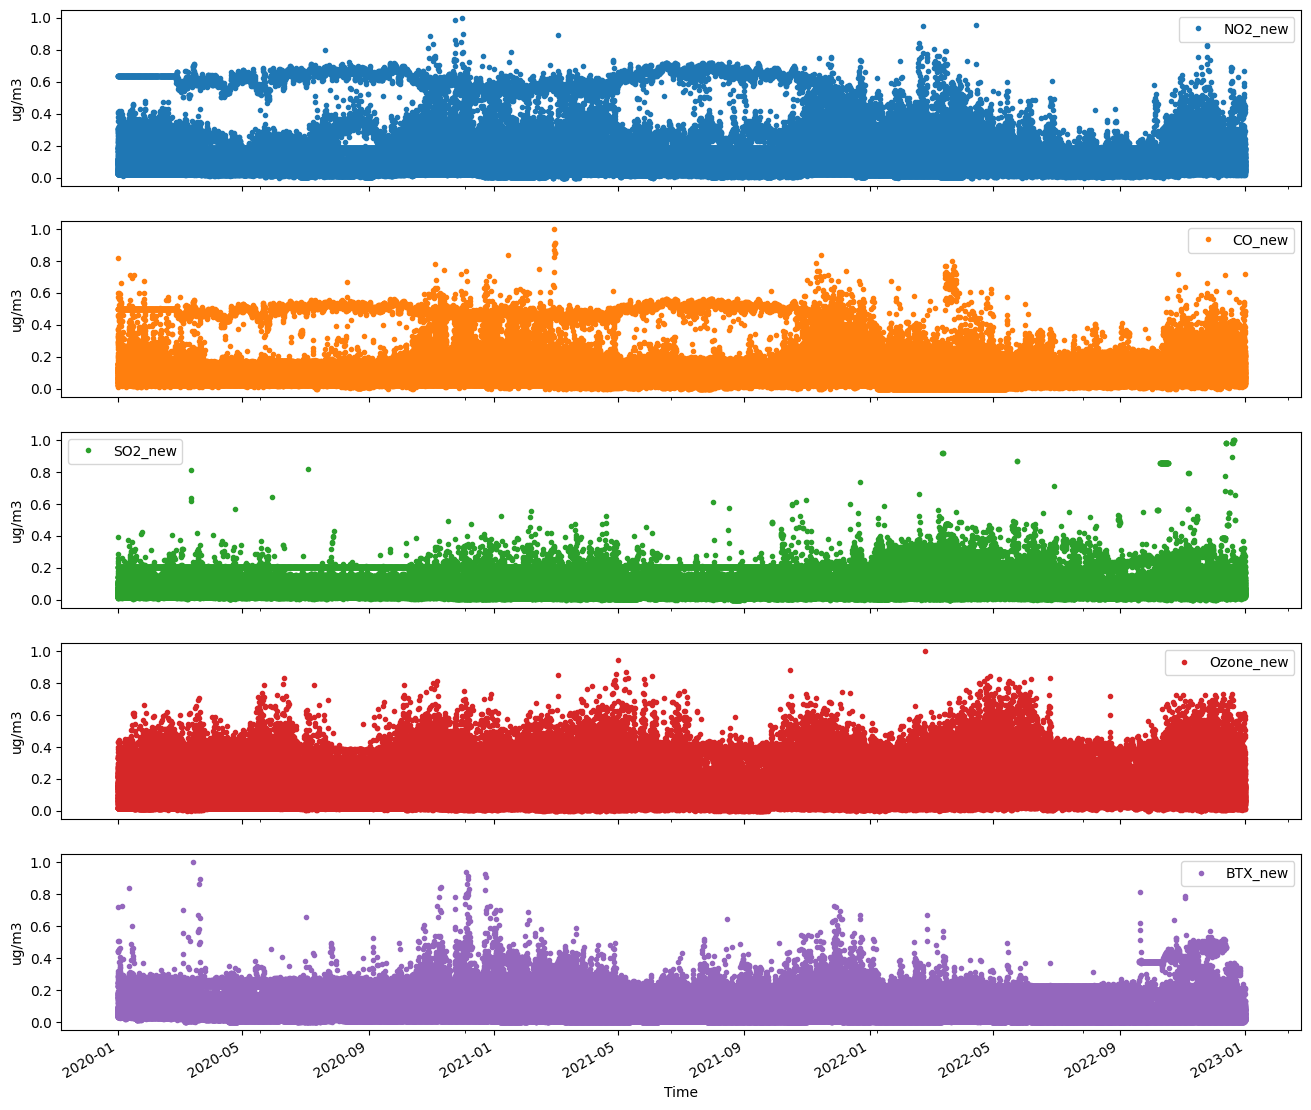

In [ ]:
def visualisepollutants(udata, column):
    data = udata.copy()
    data.set_index('Time Periods',inplace=True)

    axes = data[column].plot(marker='.', alpha=1, linestyle='None', figsize=(16, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Time')
        ax.set_ylabel('ug/m3')
visualisepollutants(nCityData, pollutant)

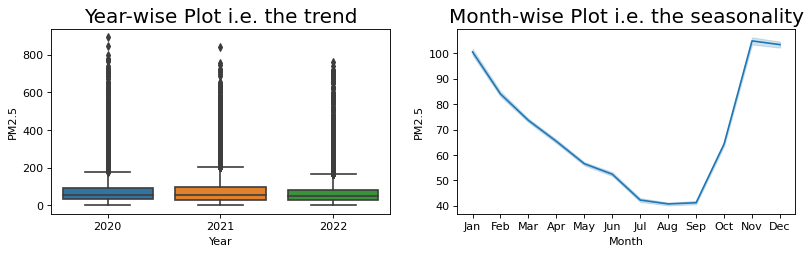

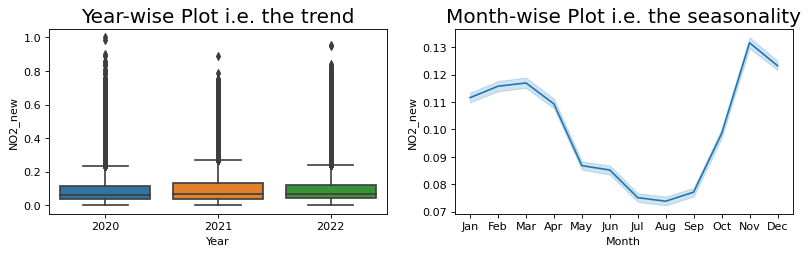

In [ ]:
def trend_plot(nCityData, value):
    data = nCityData.copy()
    data['Year'] = [d.year for d in data['Time Periods']]
    data['Month'] = [d.strftime('%b') for d in data['Time Periods']]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.lineplot(x='Month', y=value, data=data.loc[~data.Year.isin([2020, 2023]), :])

    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18);
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()
value='PM2.5'
trend_plot(nCityData,value)
value='NO2_new'
trend_plot(nCityData,value)

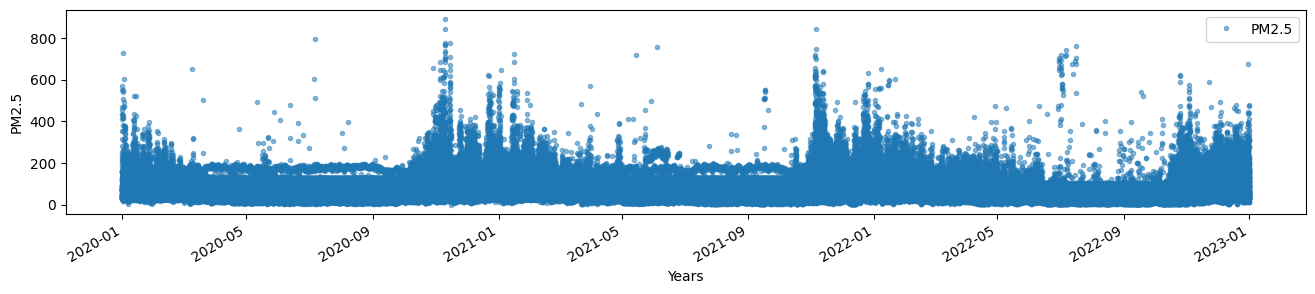

In [ ]:
def visualiseAQI(udata, column):
    data = udata.copy()
    data.set_index('Time Periods',inplace=True)

    axes = data[column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('PM2.5')
visualiseAQI(nCityData, ['PM2.5'])

In [ ]:
from pandas import DataFrame
from pandas import concat

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
newCityData = pd.read_csv('newCityData.csv', header=0, index_col=0)
values = newCityData.values

In [ ]:
values[:]

array([['Delhi', '2020-01-01 00:00:00', 549.2568780528188, ...,
        0.0519884022325038, 0.1185830933041276, 0.0815356964996272],
       ['Delhi', '2020-01-01 04:00:00', 435.4383031695714, ...,
        0.0593531997105247, 0.1486108888957558, 0.0974736832427445],
       ['Delhi', '2020-01-01 08:00:00', 453.3123782992378, ...,
        0.054107510949353, 0.1528747149217179, 0.0955355629339471],
       ...,
       ['Mumbai', '2022-12-31 12:00:00', 176.6356896593264, ...,
        0.2745783768600185, 0.4757330636055723, 0.0311512324358337],
       ['Mumbai', '2022-12-31 16:00:00', 189.7400214362272, ...,
        0.20530749979637, 0.3705898828552637, 0.0218448925571252],
       ['Mumbai', '2022-12-31 20:00:00', 164.385975332711, ...,
        0.1726581490250149, 0.2286273567989974, 0.026537141331699]],
      dtype=object)

In [ ]:
cities = ['Mumbai','Kolkata','Patna','Bhopal','Varanasi', 'Bhilai']
somecityday = newCityData[newCityData['Time Periods'] >= '2020-01-01']
PM = somecityday[somecityday.City.isin(cities)][['Time Periods','City','PM2.5']]

In [ ]:
Delhi_data = newCityData[newCityData['City']=='Bhilai']
Delhi_data.set_index('Time Periods',inplace=True, drop = False)
Delhi_data.index = pd.to_datetime(Delhi_data.index)

In [ ]:
Delhi_data

,City,Time Periods,PM2.5,NO2_new,CO_new,SO2_new,Ozone_new,BTX_new
Time Periods,,,,,,,,
2020-01-01 00:00:00,Bhilai,2020-01-01 00:00:00,30.340937,0.040487,0.036234,0.102257,0.137498,0.088260
2020-01-01 04:00:00,Bhilai,2020-01-01 04:00:00,30.340937,0.040487,0.036234,0.102257,0.137498,0.088260
2020-01-01 08:00:00,Bhilai,2020-01-01 08:00:00,30.340937,0.040487,0.036234,0.102257,0.137498,0.088260
2020-01-01 12:00:00,Bhilai,2020-01-01 12:00:00,30.340937,0.040487,0.036234,0.102257,0.137498,0.088260
2020-01-01 16:00:00,Bhilai,2020-01-01 16:00:00,30.340937,0.040487,0.036234,0.102257,0.137498,0.088260
...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,Bhilai,2022-12-31 04:00:00,34.239178,0.034780,0.035821,0.102637,0.196140,0.090581
2022-12-31 08:00:00,Bhilai,2022-12-31 08:00:00,34.239178,0.034780,0.035821,0.102637,0.196140,0.090581
2022-12-31 12:00:00,Bhilai,2022-12-31 12:00:00,34.239178,0.034780,0.035821,0.102637,0.196140,0.090581


In [ ]:
final_data = Delhi_data[['PM2.5']]

In [ ]:
final_data

,PM2.5
Time Periods,
2020-01-01 00:00:00,30.340937
2020-01-01 04:00:00,30.340937
2020-01-01 08:00:00,30.340937
2020-01-01 12:00:00,30.340937
2020-01-01 16:00:00,30.340937
...,...
2022-12-31 04:00:00,34.239178
2022-12-31 08:00:00,34.239178
2022-12-31 12:00:00,34.239178


In [ ]:
seasonal_data = final_data
#seasonal_data = seasonal_data.resample(rule='MS').mean()
seasonal_data

,PM2.5
Time Periods,
2020-01-01 00:00:00,30.340937
2020-01-01 04:00:00,30.340937
2020-01-01 08:00:00,30.340937
2020-01-01 12:00:00,30.340937
2020-01-01 16:00:00,30.340937
...,...
2022-12-31 04:00:00,34.239178
2022-12-31 08:00:00,34.239178
2022-12-31 12:00:00,34.239178


In [ ]:
len(seasonal_data)

6576

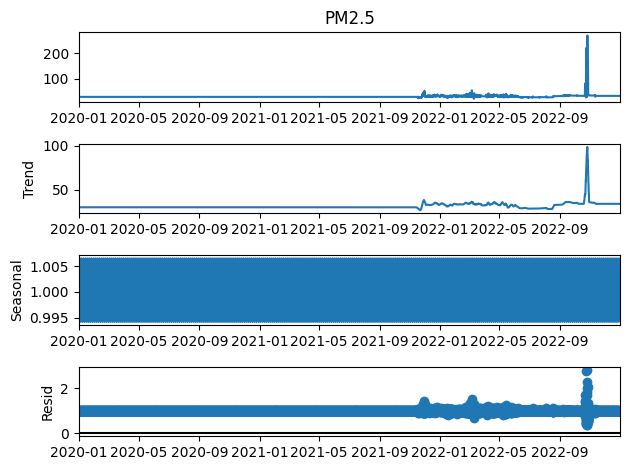

In [ ]:
val ='PM2.5'
from statsmodels.tsa.seasonal import seasonal_decompose
Delhi_PM = seasonal_data[val].tail(4000)
result = seasonal_decompose(Delhi_PM, model='multiplicative')
result.plot();

In [ ]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;

In [ ]:
auto_arima(y=Delhi_PM,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=6)

In [ ]:
len(Delhi_data)

6576

In [ ]:
train = Delhi_PM[:6546]
test = Delhi_PM[6546:]

In [ ]:
test

Time Periods
2022-12-27 00:00:00    109.027102
2022-12-27 04:00:00     75.289255
2022-12-27 08:00:00     81.072922
2022-12-27 12:00:00     94.775039
2022-12-27 16:00:00     94.174764
2022-12-27 20:00:00    122.225863
2022-12-28 00:00:00     97.671108
2022-12-28 04:00:00     85.877311
2022-12-28 08:00:00     99.203982
2022-12-28 12:00:00     82.628738
2022-12-28 16:00:00     79.901431
2022-12-28 20:00:00    147.252026
2022-12-29 00:00:00    125.304532
2022-12-29 04:00:00    125.938686
2022-12-29 08:00:00    138.270859
2022-12-29 12:00:00    161.809757
2022-12-29 16:00:00    163.951636
2022-12-29 20:00:00    167.294046
2022-12-30 00:00:00    138.516686
2022-12-30 04:00:00    115.462646
2022-12-30 08:00:00    111.363689
2022-12-30 12:00:00    110.791511
2022-12-30 16:00:00    150.163440
2022-12-30 20:00:00    258.415654
2022-12-31 00:00:00    219.045757
2022-12-31 04:00:00    143.350997
2022-12-31 08:00:00    132.164849
2022-12-31 12:00:00    130.472453
2022-12-31 16:00:00    129.322467
2

In [ ]:
model=SARIMAX(train,order=(4,1,1),seasonal_order=(2,0,1,6),)
results=model.fit()
results.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 4H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 4H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             PM2.5   No. Observations:                 6546
Model:             SARIMAX(4, 1, 1)x(2, 0, 1, 6)   Log Likelihood              -32144.408
Date:                           Thu, 20 Apr 2023   AIC                          64306.817
Time:                                   19:58:14   BIC                          64367.895
Sample:                               01-01-2020   HQIC                         64327.934
                                    - 12-26-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6367      0.003    196.228      0.000       0.630       0.643
ar.L2         -0.0339      0.005     -6.255      0.000      -0.044      -0.023
ar.L3          0.0266      0.005      5.210      0.000       0.017       0.037
ar.L4          0.0545      0.008      6.998      0.000       0.039       0.070
ma.L1         -0.9937      0.002   -627.810      0.000      -0.997      -0.991
ar.S.L6        1.1581      0.006    179.317      0.000       1.145       1.171
ar.S.L12      -0.1611      0.006    -25.839      0.000      -0.173      -0.149
ma.S.L6       -0.9346      0.004   -210.470      0.000      -0.943      -0.926
sigma2      1085.6119      3.443    315.287      0.000    1078.863    1092.361
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):           1090815.75
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             3.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        65.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = results.predict(start=6549, end=6578, typ='levels').rename('Predictions')

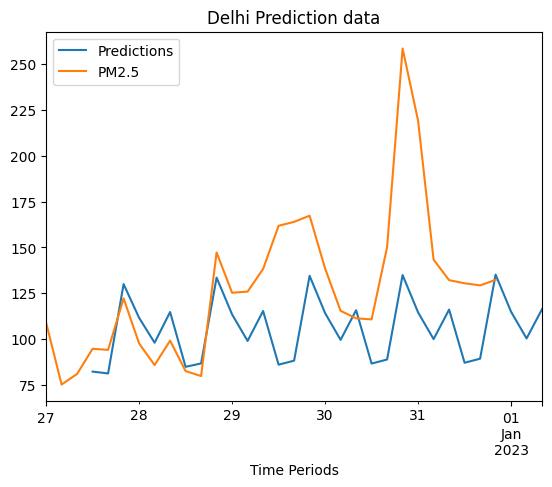

In [ ]:
predictions.plot(legend=True)
test.plot(legend=True,title="Delhi Prediction data");

In [ ]:
len(predictions)

30

In [ ]:
len(test)

30

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error,mean_poisson_deviance,mean_gamma_deviance
import math

#print('Mean AQI:',test.mean())
#forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
#bias = sum(forecast_errors) * 1.0/len(test)
#print('Bias: %f' % bias)

mae = mean_absolute_error(test, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, predictions))
#print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
print('MAPE: '+str(mape))
r2score=r2_score(test, predictions)
print('r2score: '+str(r2score))
explainedVariance_score=explained_variance_score(test, predictions)
print('explainedVariance_score: '+str(explainedVariance_score))
#me=max_error(test, predictions)
#print('me: '+str(me))
#mpd=mean_poisson_deviance(test, predictions)
#print('mpd: '+str(mpd))
mgd=mean_gamma_deviance(test, predictions)
print('mgd: '+str(mgd))

MAPE: 0.20733517818018535


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 4H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 4H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


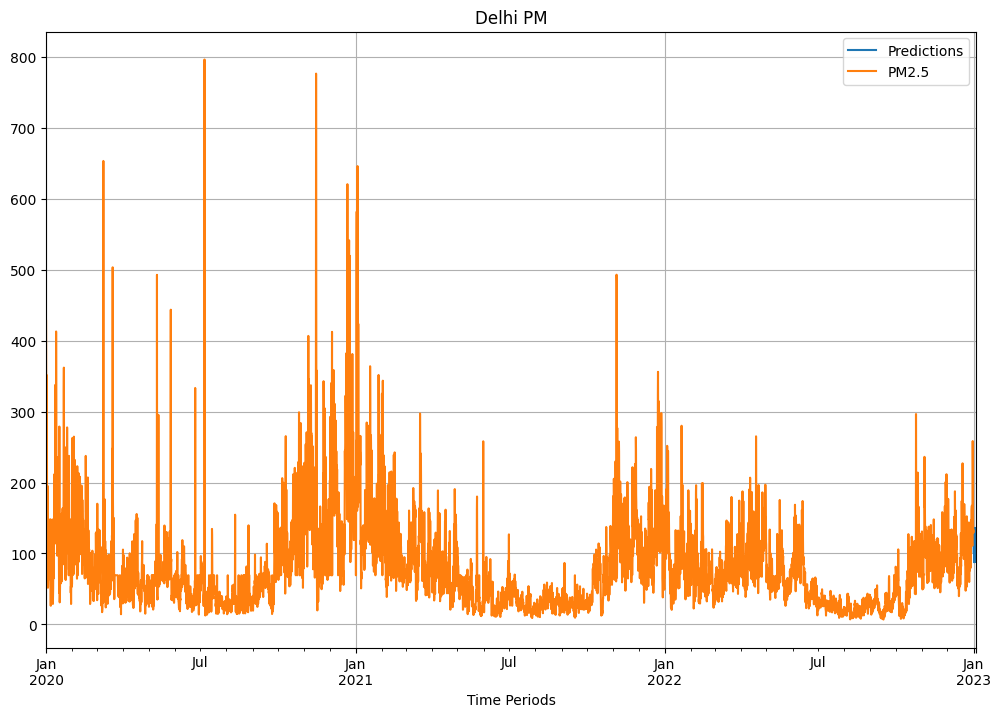

In [ ]:
# Forming the model:
final_model = SARIMAX(train,order=(4,1,1),seasonal_order=(2,0,1,6))
results = final_model.fit()
#Obtaining predicted values:
predictions = results.predict(start=6576, end=6593, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Delhi_PM.plot(legend=True,figsize=(12,8),grid=True,title="Delhi PM");

In [ ]:
predictions

2023-01-01 00:00:00    114.918200
2023-01-01 04:00:00    100.404576
2023-01-01 08:00:00    116.428749
2023-01-01 12:00:00     87.551855
2023-01-01 16:00:00     89.764397
2023-01-01 20:00:00    135.426116
2023-01-02 00:00:00    115.217502
2023-01-02 04:00:00    100.754365
2023-01-02 08:00:00    116.720047
2023-01-02 12:00:00     87.946552
2023-01-02 16:00:00     90.150971
2023-01-02 20:00:00    135.648254
2023-01-03 00:00:00    115.511678
2023-01-03 04:00:00    101.100124
2023-01-03 08:00:00    117.008304
2023-01-03 12:00:00     88.337994
2023-01-03 16:00:00     90.534445
2023-01-03 20:00:00    135.868342
Freq: 4H, Name: Predictions, dtype: float64

In [ ]:
predictions.to_csv("Ahmed_pred.csv")

In [ ]:
df_anova = pd.read_csv('newCityData.csv')
df_anova = df_anova[['PM2.5','City']]

In [ ]:
from scipy import stats
Citys = pd.unique(df_anova.City.values)
d_data = {city:df_anova['PM2.5'][df_anova.City == city] for city in Citys}

F, p = stats.f_oneway(d_data['Mumbai'], d_data['Kolkata'], d_data['Ahmedabad'])

print("p-value for significance is: ", p)

if p<0.05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value for significance is:  1.7629917537323432e-217
We reject the null hypothesis


In [ ]:
from scipy import stats
Citys = pd.unique(df_anova.City.values)
d_data = {city:df_anova['PM2.5'][df_anova.City == city] for city in Citys}

F, p = stats.f_oneway(d_data['Agartala'], d_data['Gandhinagar'])

print("p-value for significance is: ", p)

if p<0.05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value for significance is:  9.178396178942712e-119
We reject the null hypothesis


In [ ]:
from scipy import stats
Citys = pd.unique(df_anova.City.values)
d_data = {city:df_anova['PM2.5'][df_anova.City == city] for city in Citys}

F, p = stats.f_oneway(d_data['Muzaffarpur'], d_data['Srinagar'])

print("p-value for significance is: ", p)

if p<0.05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value for significance is:  1.2880902728296566e-221
We reject the null hypothesis


In [ ]:
from scipy import stats
Citys = pd.unique(df_anova.City.values)
d_data = {city:df_anova['PM2.5'][df_anova.City == city] for city in Citys}

F, p = stats.f_oneway(d_data['Kanpur'], d_data['Prayagraj'])

print("p-value for significance is: ", p)

if p<0.05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value for significance is:  4.075718159607981e-94
We reject the null hypothesis
